# Tech Challenge - Fase 1

## Introdução


Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.
A base de dados utilizada nesse exercício, deve seguir o exemplo abaixo:

```
age,gender,bmi,children,smoker,region,charges
56,female,29.774,2,yes,southwest,31109.889763423336
46,male,25.857,1,no,northeast,26650.702646642694
32,male,23.014,0,no,southwest,21459.03799039332
```

## Base de dados

A base de dados utilizada nesse notebook, segue o modelo definido pelo exercício. Ela contém os seguintes atributos, com informações individuais de usuários de planos de saúde:


*   **Age:** Idade do beneficiário
*   **Gender:** Gênero do benefiário (male / female)
*   **BMI:**   *Índice de massa corporal*. Medida internacional usada para calcular se uma pessoa está no peso ideal, calculado a partir da relação entre altura e peso (kg / m ^ 2), idealmente os valores considerados saudáveis devem ficar entre 18,5 a 24,9.
*   **Children:** Quantidade de filhos do beneficiário, cobertos pelo plano de saúde
*   **Smoker:** Indica se o beneficiário é fumante ou não
*   **Region:** Região geográfica da localização do beneficiário. Considerando regiões dos EUA ( northeast, southeast, southwest, northwest).
*   **Charges:** Valores gastos com plano de saúde

### Importando bibliotecas

In [1]:

import seaborn as sb
import matplotlib.pyplot as mplt
import pandas as pd

### Carregando dados


In [2]:
data = pd.read_csv('insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Limpeza dos dados
Vamos fazer a limpeza da base de dados. Vamos verificar a existência de dados nulos e duplicados e vamos removê-los.

Se existir nas base de dados algum valor nulo em relação a charges, vamos substituir o valor nulo pela mediana de gastos

In [ ]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Ajustar o imputer aos dados
imputer.fit(data[['charges']])

# Transformar os dados, substituindo os valores nulos pela mediana
data['charges'] = imputer.transform(data[['charges']])
# Transformar os dados, substituindo os valores nulos pela mediana

In [ ]:
data = data.dropna()

In [ ]:
data.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(1337, 7)

### EDA - Análise exploratória dos dados

Vamos analisar quantos dados existem na nossa base

In [ ]:
data.shape

(1337, 7)

Agora vamos analisar o formato dos dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


Podemos perceber que as propriedades `age`, `bmi`, `children` e `charges` são numéricas.
Já as propriedades `sex`, `smoker` e `region` são propriedades categóricas.

Considerando as variáveis numéricas, vamos ver a distribuição delas em gráficos

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

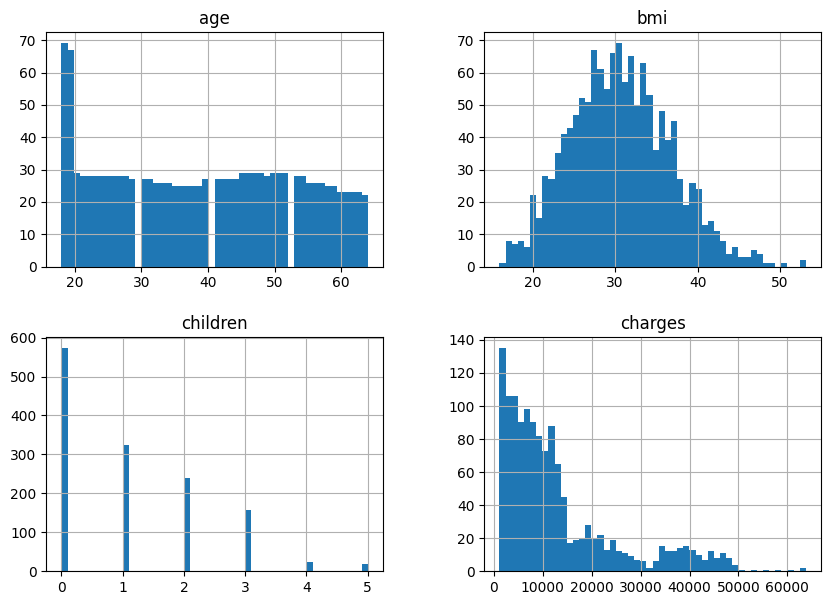

In [ ]:
data.hist(bins=50, figsize=(10,7))

Podemos concluir a partir dos gráficos acima que:

*   A maioria dos usuários de planos de saúde, são pessoas jovens e sem filhos.
*   A maioria dos usuários está acima do peso. Considerando que a classificação do IMC para sobrepeso tem como base valores entre 25 e 39
*   Os valores possuem dimensões diferentes, Talvez seja necessário normalizar os dados


Vamos analisar a distribuição das propriedades utilizando gráficos de Boxplot

<Axes: ylabel='age'>

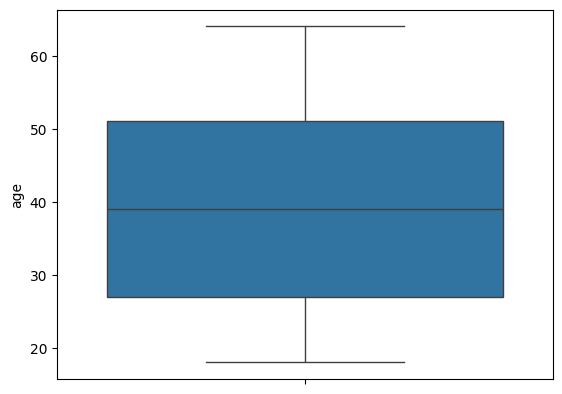

In [ ]:
sb.boxplot(data=data, y='age')

<Axes: ylabel='bmi'>

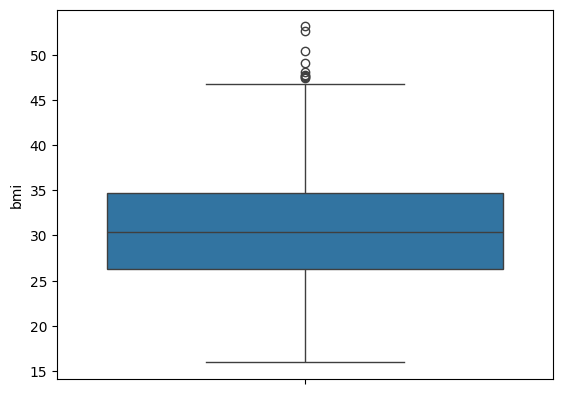

In [ ]:
sb.boxplot(data=data, y='bmi')

<Axes: ylabel='charges'>

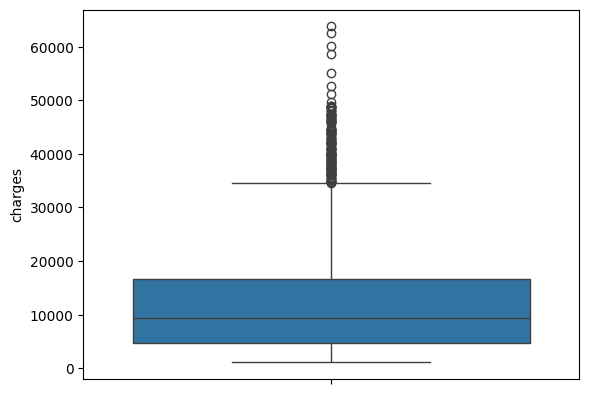

In [ ]:
sb.boxplot(data=data, y='charges')

Podemos observar que existem outliers nos valores de gastos e IMC. É interessante analisar a performance do modelo com e sem os outliers na base.


Vamos agora analisar a relação entre as variáveis nos seguintes cenários:

 - Qual a proporção de gastos em relação ao sexo do usuário
 - Qual a proporção de gastos em relação a idade
 - Qual a proporção de gastos em relação ao BMI
 - Qual a proporção de gastos em relação ao fato de ser fumante / não
 - Qual a proporção de gastos em relação a quantidade de crianças

#### Gastos x Sexo

Vamos primeiro analisar a quantidade de homens e mulheres na nossa base

<Axes: xlabel='sex', ylabel='count'>

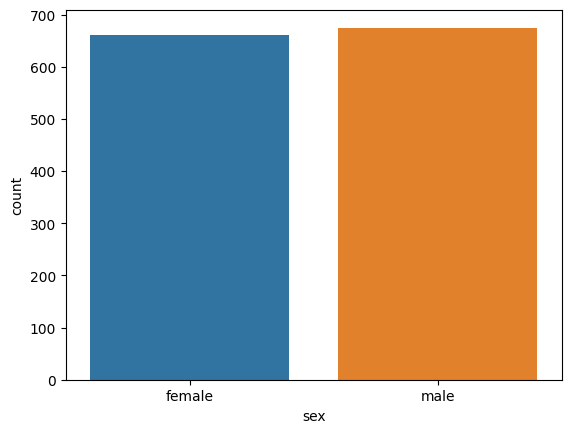

In [ ]:
sb.countplot(x = 'sex', hue = 'sex', data = data)

Nossa base de dados está bem balanceada em relação à quantidade de usuários homens e mulheres. Não existe uma diferença significativa entre eles.

Agora vamos analisar a diferença de gastos, em média, entre homens e mulheres

In [ ]:
data['charges'].groupby(data['sex']).mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

Embora homens gastem mais, também não existe uma diferença significativa entre homens e mulheres em relação aos gastos.

#### Gastos x Idade


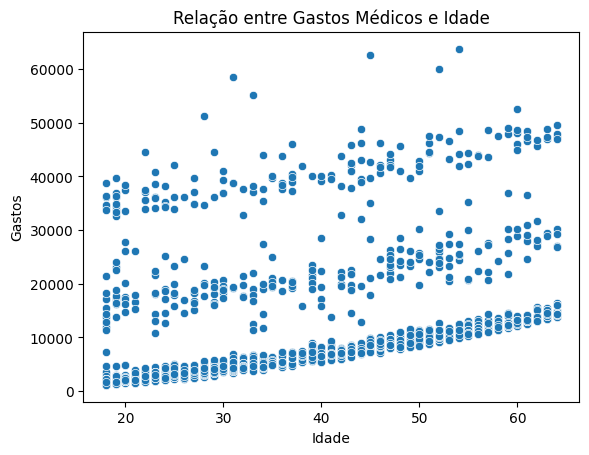

In [ ]:
sb.scatterplot(x='age', y='charges', data=data)
mplt.title('Relação entre Gastos Médicos e Idade')
mplt.xlabel('Idade')
mplt.ylabel('Gastos')
mplt.show()

Podemos verificar com o gráfico acima que a medida que os usuários vão ficando mais velhos, os gastos aumentam.

Como existem intervalos de gastos bem distintos no gráfico acima, devem existir outras relações entre as propriedades desse modelo. Devemos continuar nossa análise considerando outras relações.

#### Gastos x IMC

Vamos analisar a relação entre IMC (bmi) e gastos

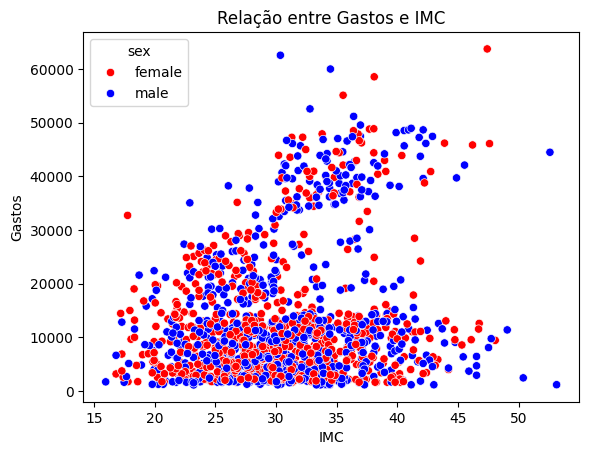

In [ ]:
  sb.scatterplot(x='bmi', y='charges',  hue='sex', data=data,palette={'male': 'blue', 'female': 'red'})
  mplt.title('Relação entre Gastos e IMC')
  mplt.xlabel('IMC')
  mplt.ylabel('Gastos')
  mplt.show()

Podemos perceber uma grande quantidade de usuários, com IMC acima de 30 ( indicando Obesidade), pagando valores mais altos. Isso deve indicar que usuários com Obesidade acabam gastando mais com planos de saúde.

Vamos analisar a relação entre gastos e fumantes


#### Gastos x Fumantes

Vamos analisar se existe relação entre usuários fumantes e os valores gastos com planos de saúde

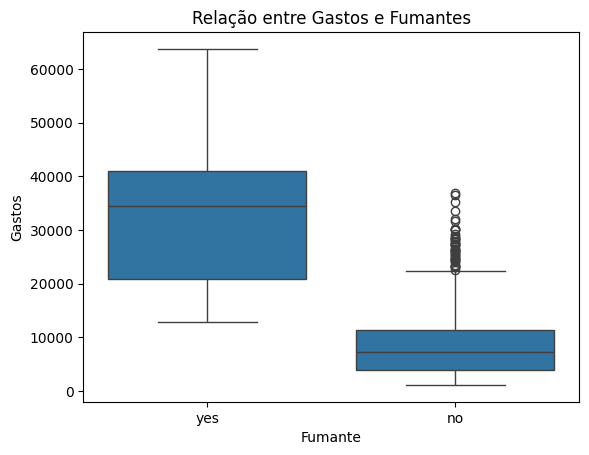

In [ ]:
sb.boxplot(x='smoker', y='charges', data=data)
mplt.title('Relação entre Gastos e Fumantes')
mplt.xlabel('Fumante')
mplt.ylabel('Gastos')
mplt.show()

Podemos perceber que usuários fumantes gastam consideravelmente mais do que usuários não fumantes.

Já que existe uma relação entre gastos e fumantes e gastos e o IMC do usuário. Vamos analisar a relação entre `gastos x fumantes x IMC`

#### Gastos x Fumantes x IMC

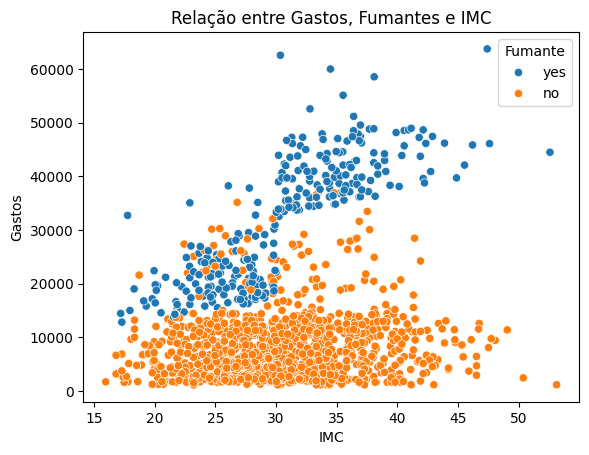

In [ ]:
sb.scatterplot(data=data, x='bmi', y='charges', hue='smoker')
mplt.title('Relação entre Gastos, Fumantes e IMC')
mplt.xlabel('IMC')
mplt.ylabel('Gastos')
mplt.legend(title='Fumante')
mplt.show()



*   **Gastos x Fumantes:** É bem claro no gráfico acima que usuários fumantes tendem a ter gastos significativamente mais altos comparados com os não fumantes. Essa relação existe independentemente do IMC. Isso sugere que ser fumante é uma característica significativa que aumenta os custos com planos de saúde.
*   **Gastos x IMC:** Tanto para fumantes como para não fumantes, existe uma tendência de aumento dos gastos em pessoas com IMC acima de sobrepeso. No entanto, esse aumento é mais acentuado nos fumantes.
*  **Fumante x IMC:** A relação entre ser fumante e ter um IMC elevado potencializa os gastos com planos de saúde. Fumantes com IMC mais alto estão entre os que têm os maiores gastos médicos.


#### Gastos x Fumantes x Idade

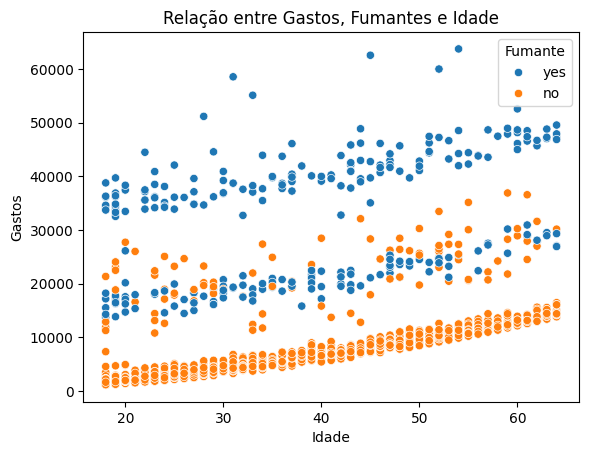

In [ ]:
sb.scatterplot(data=data, x='age', y='charges', hue='smoker')
mplt.title('Relação entre Gastos, Fumantes e Idade')
mplt.xlabel('Idade')
mplt.ylabel('Gastos')
mplt.legend(title='Fumante')
mplt.show()

Já verificamos em gráficos anteriores que a idade é um fator que aumenta os gastos com plano de saúde. No gráfico acima podemos perceber também que independente da idade, fumantes pessoas fumantes vão ter gastos mais elevados com planos de saúde.


Vamos analisar a correlação entre as variáveis

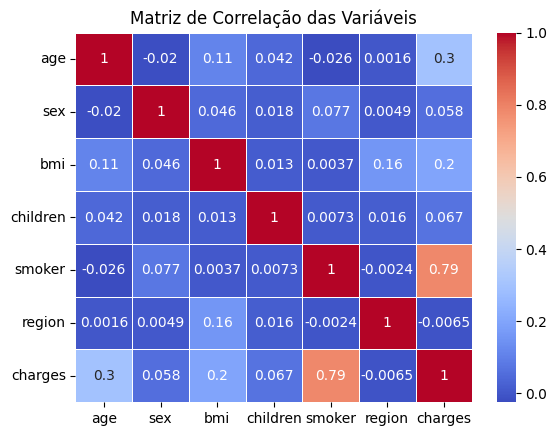

<Figure size 1200x800 with 0 Axes>

In [ ]:
#Aplicar Label Encoder

from sklearn.preprocessing import LabelEncoder
cat_cols = data.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Calcular a matriz de correlação
corr_matrx = data.corr()

sb.heatmap(corr_matrx, annot=True, cmap='coolwarm', linewidths=0.5)
mplt.title('Matriz de Correlação das Variáveis')
mplt.figure(figsize=(12, 8))
mplt.show()

Analisando a matriz de correlação acima, podemos confirmar o que já verificamos anteriormente. As features que mais influenciam os gastos são:


*   Ser fumante
*   Alto IMC
*   Idade


O número de filhos e a região têm pouca influência nos gastos médicos.

A forte correlação entre fumar e os gastos nos mostra a importância de considerar, no nosso modelo preditivo, a caracteristica de ser ou não fumante.

## Modelo Preditivo

Vamos construir o nosso modelo, considerando diferentes algoritmos para verificar qual tem a melhor performance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def best_model(x, y):

  # Dividir os dados em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Padronizar os dados
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Hiperparâmetros foram definidos a partir de testes com valores aleatórios
  # Os valores definidos foram os que geraram melhor resultado
  hiper_params = {
    'n_estimators': 400,
    'max_depth': 30,
    'min_samples_split': 9,
    'min_samples_leaf': 9,
  }

  # Inicializar os modelos
  models = {
      'Linear Regression': LinearRegression(),
      'Decision Tree': DecisionTreeRegressor(
          max_depth=hiper_params['max_depth'],
          min_samples_split=hiper_params['min_samples_split'],
          min_samples_leaf=hiper_params['min_samples_leaf'],
      ),
      'Random Forest Regressor ': RandomForestRegressor(
          n_estimators=hiper_params['n_estimators'],
          max_depth=hiper_params['max_depth'],
          min_samples_split=hiper_params['min_samples_split'],
          min_samples_leaf=hiper_params['min_samples_leaf'],
          random_state=7)
  }

  # Lista para armazenar os resultados
  results = []

  # Treinar e avaliar os modelos
  for model_name, model in models.items():
      model.fit(X_train_scaled, y_train)
      y_pred = model.predict(X_test_scaled)
      r2 = r2_score(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      rmse = np.sqrt(mse)
      mae = mean_absolute_error(y_test, y_pred)
      results.append({
          'Model': model_name,
          'R^2': r2,
          'MSE': mse,
          'RMSE': rmse,
          'MAE': mae
      })

      # Visualizar as previsões de cada modelo
      mplt.figure(figsize=(10, 6))
      mplt.scatter(y_test, y_pred, alpha=0.3)
      mplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
      mplt.xlabel('Valores Reais')
      mplt.ylabel('Previsões')
      mplt.title(f'Previsões vs. Valores Reais ({model_name})')
      mplt.show()

  # Converter a lista de resultados para um DataFrame
  results_df = pd.DataFrame(results)

  # Exibir os resultados
  print(results_df)

  # Identificar o melhor modelo com base no R²
  best_model_name = results_df.loc[results_df['R^2'].idxmax()]['Model']
  print(f'O melhor modelo é: {best_model_name}')

  # Visualizar as previsões do melhor modelo
  best_model = models[best_model_name]
  y_pred_best = best_model.predict(X_test_scaled)


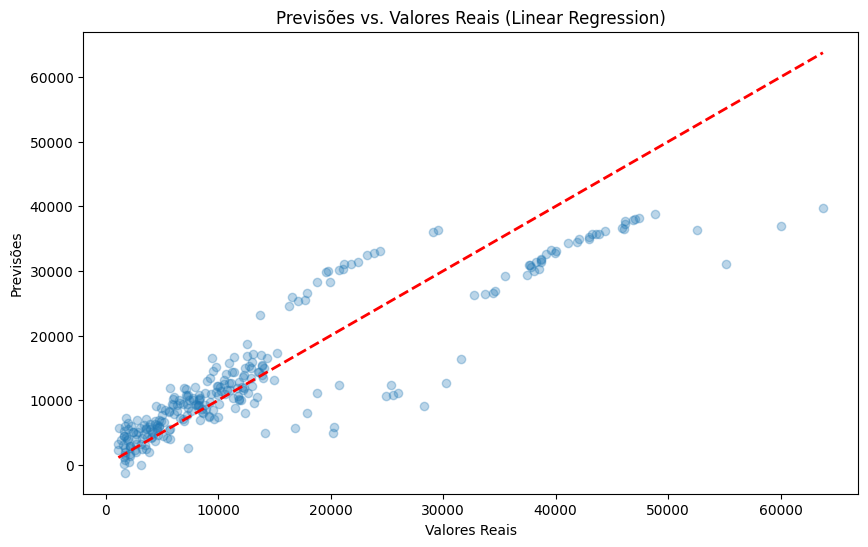

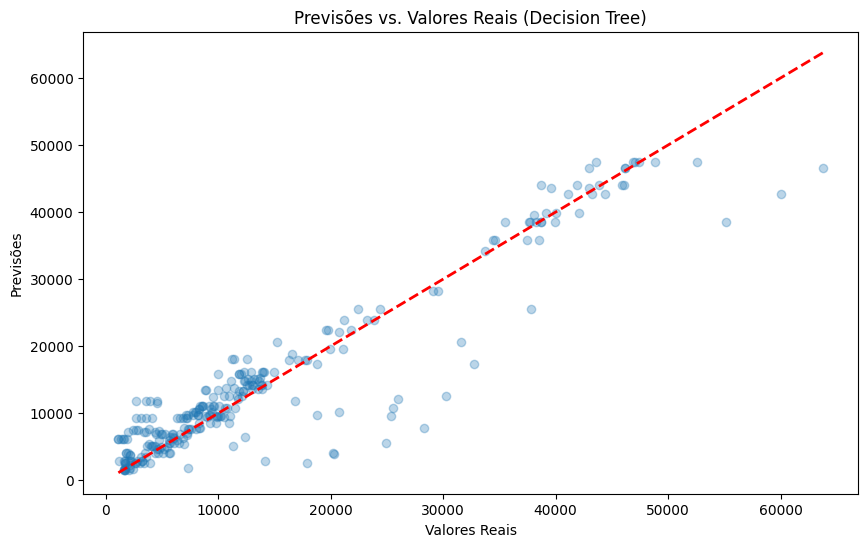

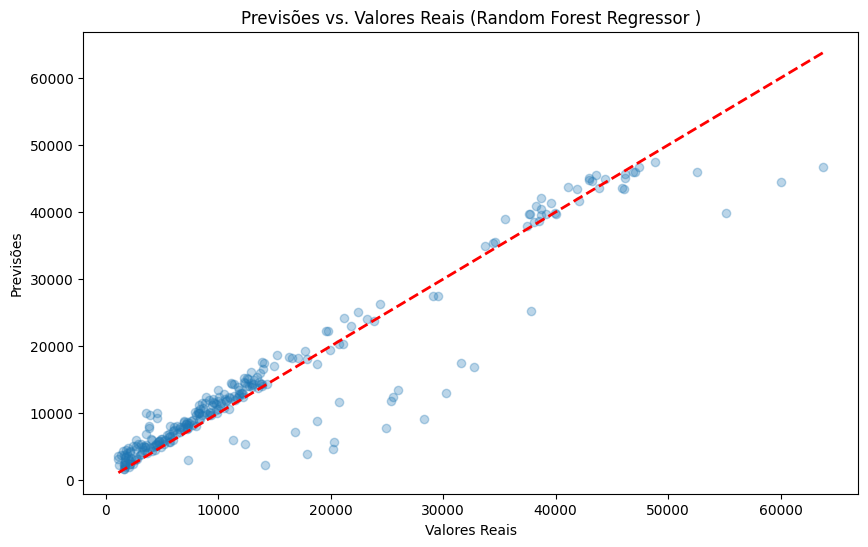

                      Model       R^2           MSE         RMSE          MAE
0         Linear Regression  0.806847  3.549310e+07  5957.608800  4182.353155
1             Decision Tree  0.879587  2.212657e+07  4703.888841  2750.517034
2  Random Forest Regressor   0.901478  1.810403e+07  4254.883296  2440.429882
O melhor modelo é: Random Forest Regressor 


In [ ]:
# Testar modelo
# Separar variáveis independentes e dependentes
X = data.drop('charges', axis=1)
y = data.charges
best_model(X, y)

# Testar modelo, removendo outliers

# Definindo primeiro e terceiro quartis para calculo do IQR
# Q1 = data['charges'].quantile(0.25)
# Q3 = data['charges'].quantile(0.75)
# IQR = Q3 - Q1

# bottom_threshold = Q1 - 1.5 * IQR
# top_threshold = Q3 + 1.5 * IQR

# no_outliers_data = data[(data['charges'] >= bottom_threshold) & (data['charges'] <= top_threshold)]
# X = no_outliers_data.drop('charges', axis=1)
# y = no_outliers_data['charges']
# best_model(X,y)